Define paths

In [1]:
#############
###paths#####
#############
import sys
import os

from importlib_metadata import distribution
pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

from numerical.cn_plot import plot1D, surfpattern
from numerical.fourierAnalysisFunctions import powerspectrumFunction, entropyFunction, fourierAnalysisFunction
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

Define variables and upload data for figures

In [2]:
circuit_n='turinghill'
variant= 0
n_species=2
mechanism='nogrowth'
parID=30997#[41018,30997]
L=50; x_gridpoints=5; J=L*x_gridpoints;I=J 
T=2000; t_gridpoints = 25; N=T*t_gridpoints #Number of timepoints
filename='%s_variant%s_%s_ID%r_L%r_J%r_T%r_N%r'%(circuit_n,variant,mechanism,parID,L,J,T,N)

U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename), 'rb'))
U

Plot solution U

TypeError: object of type 'bool' has no len()

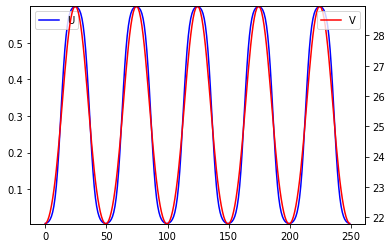

In [3]:
plot1D(U, round=False)

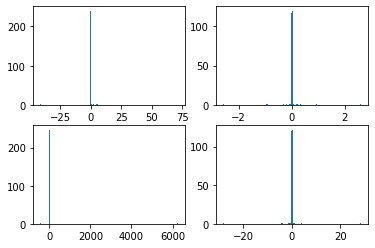

AttributeError: 'Rectangle' object has no property 'xlim'

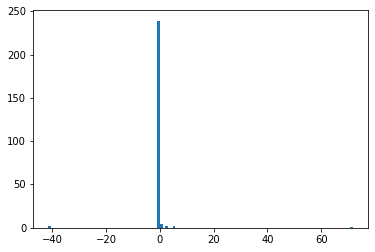

In [7]:
U=np.round(U, decimals=3)

fft_U0 = fft(U[0])
plt.subplot(221)
plt.hist(np.real(fft_U0), bins=120)
# print(np.amax(np.real(fft_U0)), np.amin(np.real(fft_U0)))
plt.subplot(222)
plt.hist(np.imag(fft_U0),bins=120)
# print(np.amax(np.imag(fft_U0)), np.amin(np.imag(fft_U0)))

plt.subplot(223)
fft_U1 = fft(U[1])
plt.hist(np.real( fft_U1),bins=120)
# print(np.amax(np.real(fft_U1)), np.amin(np.real(fft_U1)))
plt.subplot(224)
plt.hist(np.imag(fft_U1),bins=120)
# print(np.amax(np.imag(fft_U1)), np.amin(np.imag(fft_U1)))

plt.show()


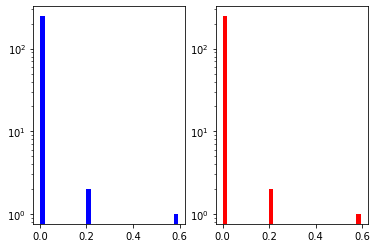

In [7]:
powerspectrumFunction(fft_U1)# np.real(fft_U0[0])**2 + np.imag(fft_U0[0])**2
# print(powerspectrum(fft_U1))
plt.subplot(121)
plt.hist(powerspectrumFunction(fft_U0),log=True, bins=30, color='b')
plt.subplot(122)
plt.hist(powerspectrumFunction(fft_U1),log=True, bins=30, color='r')
plt.show()

In [9]:

ffU,psU,HU = fourierAnalysisFunction(U[0])
ffV,psV,HV = fourierAnalysisFunction(U[1])
print(HU, HV)


0.9991141170854649 0.06560426312188435
